In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
columns=["buying","maint","doors","persons","lug_boot","safety","class"]
data=pd.read_csv("ass_3_data.csv",names=columns)

In [35]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [36]:
data.shape

(1728, 7)

In [37]:
categorical=data.select_dtypes(exclude='number')

In [38]:
categorical.shape

(1728, 7)

In [39]:
numerical=data.select_dtypes(include='number')

In [40]:
numerical.shape

(1728, 0)

In [41]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
class       1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [44]:
for i in data.columns:
    data[i]=le.fit_transform(data[i])

In [45]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


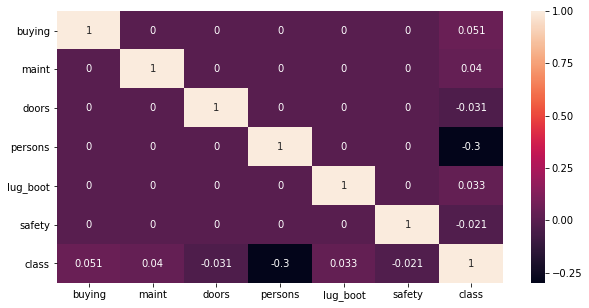

In [46]:
corr=data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True)

In [47]:
Y=data['class']
X=data.drop('class',axis=1)

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_jobs=-1,random_state=1)
rfc.fit(X_train,Y_train)
print(rfc.score(X_test,Y_test))


/home/bjit-532/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9566473988439307


# 3(a) Tuning parameters

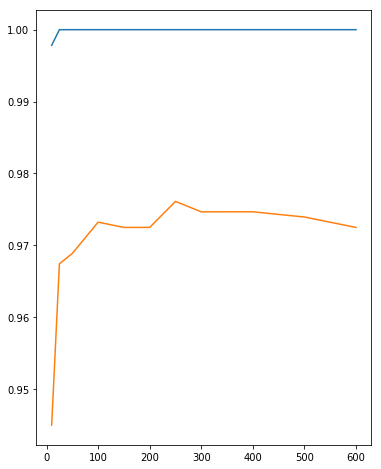

In [55]:
from sklearn.model_selection import validation_curve
param_range=[10,25,50,100,150,200,250,300,400,500,600]
curve=validation_curve(rfc,X_train,Y_train,cv=5,param_name='n_estimators',
    param_range=param_range,n_jobs=-1)

train_score=[curve[0][i].mean() for i in range (0,len(param_range))]
test_score=[curve[1][i].mean() for i in range (0,len(param_range))]
fig=plt.figure(figsize=(6,8))
plt.plot(param_range,train_score)
plt.plot(param_range,test_score)
plt.xticks=param_range

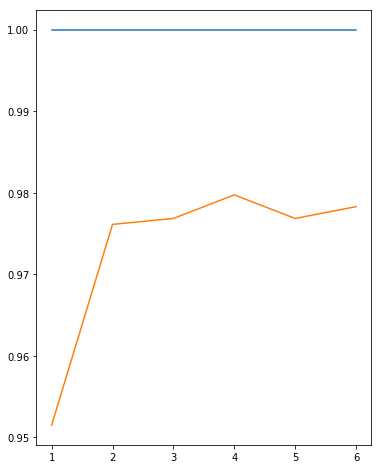

In [56]:
param_range=range(1,len(X.columns)+1)
curve=validation_curve(RandomForestClassifier(n_estimators=250,n_jobs=-1,random_state=1),X_train,Y_train,cv=5,
    param_name='max_features',param_range=param_range,n_jobs=-1)

train_score=[curve[0][i].mean() for i in range (0,len(param_range))]
test_score=[curve[1][i].mean() for i in range (0,len(param_range))]
fig=plt.figure(figsize=(6,8))
plt.plot(param_range,train_score)
plt.plot(param_range,test_score)
plt.xticks=param_range

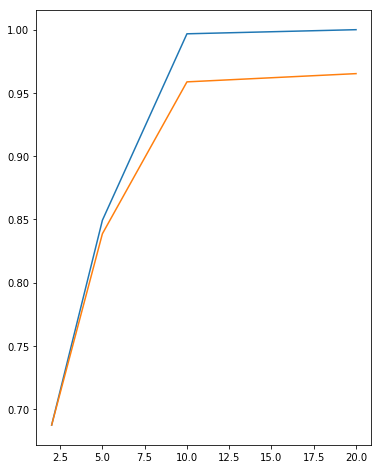

In [21]:
param_range=[2,5,10,20]
curve=validation_curve(RandomForestClassifier(n_estimators=30,n_jobs=-1,random_state=1),X_train,Y_train,cv=5,
    param_name='max_depth',param_range=param_range,n_jobs=-1)

train_score=[curve[0][i].mean() for i in range (0,len(param_range))]
test_score=[curve[1][i].mean() for i in range (0,len(param_range))]
fig=plt.figure(figsize=(6,8))
plt.plot(param_range,train_score)
plt.plot(param_range,test_score)
plt.xticks=param_range

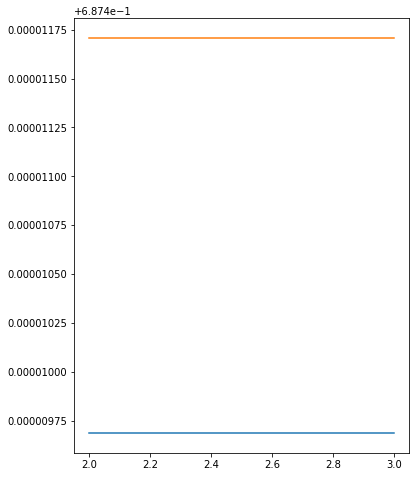

In [57]:
param_range=[2,3,None]
curve=validation_curve(RandomForestClassifier(n_estimators=250,n_jobs=-1,random_state=1),X_train,Y_train,cv=5,
    param_name='max_leaf_nodes',param_range=param_range,n_jobs=-1)

train_score=[curve[0][i].mean() for i in range (0,len(param_range))]
test_score=[curve[1][i].mean() for i in range (0,len(param_range))]
fig=plt.figure(figsize=(6,8))
plt.plot(param_range,train_score)
plt.plot(param_range,test_score)
plt.xticks=param_range

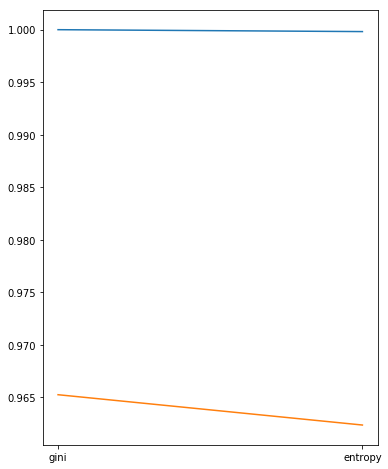

In [23]:
param_range=['gini','entropy']
curve=validation_curve(RandomForestClassifier(n_estimators=30,n_jobs=-1,random_state=1),X_train,Y_train,cv=5,
    param_name='criterion',param_range=param_range,n_jobs=-1)

train_score=[curve[0][i].mean() for i in range (0,len(param_range))]
test_score=[curve[1][i].mean() for i in range (0,len(param_range))]
fig=plt.figure(figsize=(6,8))
plt.plot(param_range,train_score)
plt.plot(param_range,test_score)
plt.xticks=param_range

In [58]:
from sklearn.model_selection import GridSearchCV
param_grid={'criterion':['gini','entropy'],
           'max_depth':[2,5,10,20],
           'max_features':[2,4,6,'auto'],
           'max_leaf_nodes':[2,3,None],}

In [59]:
grid=GridSearchCV(estimator=RandomForestClassifier(n_estimators=250,n_jobs=-1,random_state=1),
                  param_grid=param_grid,cv=10,n_jobs=-1)

In [60]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 5, 10, 20], 'max_features': [2, 4, 6, 'auto'], 'max_leaf_nodes': [2, 3, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [65]:

print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'entropy', 'max_depth': 20, 'max_features': 2, 'max_leaf_nodes': None}
0.9819102749638206


# # 3(b) Report which is the most important feature

In [66]:
print(data.columns.values)
print(rfc.feature_importances_)


['buying' 'maint' 'doors' 'persons' 'lug_boot' 'safety' 'class']
[0.19321114 0.13861154 0.0632475  0.21375591 0.07873981 0.3124341 ]


In [67]:
X.drop('doors',axis=1)
X_train1,X_test1,Y_train1,Y_test1=train_test_split(X,Y,test_size=0.2,random_state=1)

In [68]:
rfc1=RandomForestClassifier(n_estimators=30,criterion='gini',max_features=6,max_depth=20,random_state=1,
    max_leaf_nodes=None,n_jobs=-1)
rfc1.fit(X_train1,Y_train1)
rfc1.score(X_test1,Y_test1)

0.9624277456647399